In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("selected_5000_xgb.csv")
df_test = pd.read_csv("predicted_actives_xgb.csv")

df_train

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.52356,-0.729299,0.333333,2.459540,0
1,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.16993,-0.684380,0.214286,1.684200,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.686336,0.250000,0.399401,0
3,3,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,5.78136,-0.464444,0.409091,4.691270,0
4,3,0,0,0,4,0,0,0,0,0,...,0,1,0,0,1,5.52356,-0.785198,0.562500,3.469250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


In [2]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

In [3]:
#Split dataset into training set and testing set
X = df_train
y = df_train['Activity']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
#Fit
_ = vt.fit(X_train)

In [5]:
#Get the mask
mask = vt.get_support()

In [6]:
#Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask]

In [7]:
df_train_2 = X_train
df_train_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
754,2,1,2,16,3,12,4,12,41.0,21,...,0,2,0,1,0,0,0,3,1,3.000140
3088,1,1,3,13,5,6,6,6,40.0,17,...,1,0,0,0,0,0,0,3,0,1.949610
4845,1,0,1,8,1,10,2,6,23.0,16,...,0,0,1,0,0,0,0,0,0,3.103430
4702,2,2,3,14,7,4,2,12,39.0,21,...,1,0,0,1,1,1,1,0,0,2.046170
1983,1,1,2,10,3,5,4,6,31.0,18,...,0,1,0,0,0,1,1,0,1,0.402642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,2,1,2,15,5,5,3,12,38.0,22,...,0,0,0,1,0,0,0,0,0,4.471650
3103,0,1,1,3,2,5,3,0,20.0,10,...,1,0,0,1,0,0,1,2,0,0.099240
5258,1,1,2,10,4,3,4,6,28.0,10,...,1,0,0,0,0,0,1,2,0,-0.358000
2244,1,1,2,10,3,5,4,6,31.0,15,...,1,0,0,2,0,0,2,0,0,1.975260


In [8]:
X = df_test.drop(['USER_ID'],axis=1)
y = df_test['USER_ID']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.001)

In [9]:
#Fit
_ = vt.fit(X_train)

In [10]:
#Get the mask
mask = vt.get_support()
#Subset the DataFrame
test_X_train = X_train.loc[:, mask]
test_X_test = X_test.loc[:,mask]

In [11]:
df_test_2 = test_X_train
df_test_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D773,D777
1,3,1,4,23,7,9,5,18,52,24,...,0,0,1,0,2,0,0,1,0,3.33826
4,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.92439
3,2,1,3,15,5,5,3,12,37,14,...,0,1,0,0,0,1,1,1,0,3.69451
9,3,1,4,23,6,8,5,18,53,23,...,0,1,0,0,0,1,1,1,1,3.72130
8,1,0,1,7,4,9,1,6,31,30,...,1,0,1,0,0,1,0,0,0,2.78289
10,3,0,5,23,6,8,5,18,54,23,...,0,0,0,1,0,1,0,1,0,2.20629
7,1,0,3,11,4,9,5,6,36,22,...,1,0,1,1,0,0,1,1,0,1.25155
5,3,1,3,24,8,7,6,18,54,20,...,2,2,0,0,0,1,1,1,1,3.24734
2,2,1,4,20,6,10,8,12,53,24,...,0,0,1,0,2,0,0,2,0,3.70433
6,2,1,3,15,5,8,3,12,40,14,...,0,1,0,0,0,1,1,1,0,4.68560


In [12]:
df_extract = df_train_2.iloc[:,0:357]
df_lev = df_train_2.iloc[:,0:357]
df_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D770
754,2,1,2,16,3,12,4,12,41.0,21,...,1,0,2,0,1,0,0,0,3,1
3088,1,1,3,13,5,6,6,6,40.0,17,...,0,1,0,0,0,0,0,0,3,0
4845,1,0,1,8,1,10,2,6,23.0,16,...,2,0,0,1,0,0,0,0,0,0
4702,2,2,3,14,7,4,2,12,39.0,21,...,1,1,0,0,1,1,1,1,0,0
1983,1,1,2,10,3,5,4,6,31.0,18,...,2,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,2,1,2,15,5,5,3,12,38.0,22,...,1,0,0,0,1,0,0,0,0,0
3103,0,1,1,3,2,5,3,0,20.0,10,...,1,1,0,0,1,0,0,1,2,0
5258,1,1,2,10,4,3,4,6,28.0,10,...,2,1,0,0,0,0,0,1,2,0
2244,1,1,2,10,3,5,4,6,31.0,15,...,2,1,0,0,2,0,0,2,0,0


In [13]:
df_test_extract = df_test_2.iloc[:,0:289]
df_test_lev = df_test_2.iloc[:,0:289]
df_test_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D746,D747,D748,D754,D755,D756,D758,D759,D761,D762
1,3,1,4,23,7,9,5,18,52,24,...,0,3,1,2,0,0,1,0,2,0
4,2,1,3,15,5,5,3,12,37,14,...,0,0,1,1,0,1,0,0,0,1
3,2,1,3,15,5,5,3,12,37,14,...,0,0,1,1,0,1,0,0,0,1
9,3,1,4,23,6,8,5,18,53,23,...,1,0,1,3,0,1,0,0,0,1
8,1,0,1,7,4,9,1,6,31,30,...,4,2,3,1,1,0,1,0,0,1
10,3,0,5,23,6,8,5,18,54,23,...,0,2,0,3,0,0,0,1,0,1
7,1,0,3,11,4,9,5,6,36,22,...,0,1,2,2,1,0,1,1,0,0
5,3,1,3,24,8,7,6,18,54,20,...,0,0,1,4,2,2,0,0,0,1
2,2,1,4,20,6,10,8,12,53,24,...,0,3,2,1,0,0,1,0,2,0
6,2,1,3,15,5,8,3,12,40,14,...,0,0,1,1,0,1,0,0,0,1


In [14]:
#Calculating the mean and standard deviations of train dataset
mean = df_extract.mean(axis=0)
std = df_extract.std(axis=0)
df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)
df_train_3

C:\Users\brian\AppData\Local\Temp\ipykernel_22224\3096718968.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_22224\3096718968.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D770
0,2.000000,1.000000,2.000000,16.000000,3.000000,12.000000,4.000000,12.000000,41.000000,21.000000,...,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000
1,1.000000,1.000000,3.000000,13.000000,5.000000,6.000000,6.000000,6.000000,40.000000,17.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
2,1.000000,0.000000,1.000000,8.000000,1.000000,10.000000,2.000000,6.000000,23.000000,16.000000,...,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.000000,2.000000,3.000000,14.000000,7.000000,4.000000,2.000000,12.000000,39.000000,21.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
4,1.000000,1.000000,2.000000,10.000000,3.000000,5.000000,4.000000,6.000000,31.000000,18.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,1.000000,1.000000,2.000000,10.000000,4.000000,3.000000,4.000000,6.000000,28.000000,10.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
4282,1.000000,1.000000,2.000000,10.000000,3.000000,5.000000,4.000000,6.000000,31.000000,15.000000,...,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
4283,3.000000,1.000000,3.000000,22.000000,4.000000,10.000000,4.000000,18.000000,48.000000,22.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
4284,1.356909,0.814192,2.142624,11.918768,3.723856,7.983660,3.746499,8.113912,34.340803,18.892857,...,1.609477,0.402661,0.636555,0.409897,0.478291,0.261204,0.176471,0.387955,0.932306,0.331232


In [15]:
#Calculating the mean and standard deviations for test dataset
test_mean = df_test_extract.mean(axis=0)
test_std = df_test_extract.std(axis=0)
df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)
df_test_3

C:\Users\brian\AppData\Local\Temp\ipykernel_22224\3597620245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_22224\3597620245.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D689,D716,D730,D733,D742,D745,D749,D763,D765,D770
0,3.000000,1.000000,4.000000,23.000000,7.000000,9.000000,5.000000,18.000000,52.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.000000,1.000000,4.000000,23.000000,6.000000,8.000000,5.000000,18.000000,53.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000,0.000000,1.000000,7.000000,4.000000,9.000000,1.000000,6.000000,31.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.000000,0.000000,5.000000,23.000000,6.000000,8.000000,5.000000,18.000000,54.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.000000,0.000000,3.000000,11.000000,4.000000,9.000000,5.000000,6.000000,36.000000,22.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.000000,1.000000,3.000000,24.000000,8.000000,7.000000,6.000000,18.000000,54.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.000000,1.000000,4.000000,20.000000,6.000000,10.000000,8.000000,12.000000,53.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.000000,1.000000,3.000000,15.000000,5.000000,8.000000,3.000000,12.000000,40.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Standardisation of descriptor values of train dataset
df_train_4 = df_lev.loc[:, :] - df_train_3.iloc[4284]
df_train_5 = df_train_4.abs()/ df_train_3.iloc[4284]
df_train_5['mean'] = df_train_5.mean(axis=1)
df_train_5['std'] = df_train_5.std(axis=1)
df_train_5['leverages'] = (df_train_5['mean'] + 1.28) * df_train_5['std']
df_train_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
754,0.473938,0.228211,0.066565,0.342421,0.194384,0.503070,0.067664,0.478941,0.193915,0.111531,...,1.000000,1.090776,1.000000,1.000000,1.000000,2.217827,2.019027,0.472997,0.610401,1.070031
3088,0.263031,0.228211,0.400153,0.090717,0.342694,0.248465,0.601495,0.260529,0.164795,0.100189,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.217827,1.000000,0.448986,0.662968,1.146262
4845,0.263031,1.000000,0.533282,0.328790,0.731461,0.252558,0.466168,0.260529,0.330243,0.153119,...,1.439636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.659898,1.868247,3.624209
4702,0.473938,1.456422,0.400153,0.174618,0.879772,0.498977,0.466168,0.478941,0.135675,0.111531,...,1.000000,1.090776,2.828418,4.666667,1.577617,1.000000,1.000000,0.492344,0.666047,1.180465
1983,0.263031,0.228211,0.066565,0.160987,0.194384,0.373721,0.067664,0.260529,0.097284,0.047259,...,1.000000,1.000000,1.000000,4.666667,1.577617,1.000000,2.019027,0.429923,0.536998,0.918225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.473938,0.228211,0.066565,0.258519,0.342694,0.373721,0.199252,0.478941,0.106555,0.164461,...,1.000000,1.090776,1.000000,1.000000,1.000000,1.000000,1.000000,0.698559,3.319709,6.568241
3103,1.000000,0.228211,0.533282,0.748296,0.462922,0.373721,0.199252,1.000000,0.417602,0.470699,...,1.000000,1.090776,1.000000,1.000000,1.577617,1.145218,1.000000,0.722079,1.181227,2.364910
5258,0.263031,0.228211,0.066565,0.160987,0.074155,0.624233,0.067664,0.260529,0.184643,0.470699,...,1.000000,1.000000,1.000000,1.000000,1.577617,1.145218,1.000000,0.898194,4.402392,9.589264
2244,0.263031,0.228211,0.066565,0.160987,0.194384,0.373721,0.067664,0.260529,0.097284,0.206049,...,1.000000,3.181552,1.000000,1.000000,4.155235,1.000000,1.000000,0.449529,0.666143,1.152113


In [17]:
#Standardisation of descriptors values of test dataset
df_test_4 = df_test_lev.loc[:, :] - df_test_3.iloc[10]
df_test_5 = df_test_4.abs()/ df_test_3.iloc[10]
df_test_5['mean'] = df_test_5.mean(axis=1)
df_test_5['std'] = df_test_5.std(axis=1)
df_test_5['leverages'] = (df_test_5['mean'] + 1.28) * df_test_5['std']
df_test_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
1,1.210907,0.228211,0.866870,0.929730,0.879772,0.127302,0.334579,1.218412,0.514234,0.270321,...,1.439636,1.000000,6.656836,1.000000,NaN,NaN,NaN,0.836886,1.109872,2.349473
4,0.473938,0.228211,0.400153,0.258519,0.342694,0.373721,0.199252,0.478941,0.077435,0.258979,...,1.000000,1.000000,1.000000,4.666667,NaN,NaN,NaN,0.577728,2.540762,4.720046
3,0.473938,0.228211,0.400153,0.258519,0.342694,0.373721,0.199252,0.478941,0.077435,0.258979,...,1.000000,1.000000,1.000000,4.666667,NaN,NaN,NaN,0.393726,0.747177,1.250569
9,1.210907,0.228211,0.866870,0.929730,0.611233,0.002047,0.334579,1.218412,0.543354,0.217391,...,1.000000,1.000000,1.000000,4.666667,NaN,NaN,NaN,0.870537,0.880196,1.892894
8,0.263031,1.000000,0.533282,0.412691,0.074155,0.127302,0.733084,0.260529,0.097284,0.587902,...,1.439636,1.000000,1.000000,4.666667,NaN,NaN,NaN,0.722738,4.933759,9.881027
10,1.210907,1.000000,1.333588,0.929730,0.611233,0.002047,0.334579,1.218412,0.572473,0.217391,...,1.000000,1.090776,1.000000,4.666667,NaN,NaN,NaN,2.408437,16.864576,62.203926
7,0.263031,1.000000,0.400153,0.077086,0.074155,0.127302,0.334579,0.260529,0.048316,0.164461,...,1.439636,1.090776,1.000000,1.000000,NaN,NaN,NaN,0.344051,0.550704,0.894371
5,1.210907,0.228211,0.400153,1.013631,1.148311,0.123209,0.601495,1.218412,0.572473,0.058601,...,1.000000,1.000000,1.000000,4.666667,NaN,NaN,NaN,2.392107,19.984212,73.384169
2,0.473938,0.228211,0.866870,0.678026,0.611233,0.252558,1.135327,0.478941,0.543354,0.270321,...,1.439636,1.000000,6.656836,1.000000,NaN,NaN,NaN,0.856439,0.982673,2.099420
6,0.473938,0.228211,0.400153,0.258519,0.342694,0.002047,0.199252,0.478941,0.164795,0.258979,...,1.000000,1.000000,1.000000,4.666667,NaN,NaN,NaN,0.622176,1.914929,3.642532


In [18]:
#Max values of descriptors
maxValues = df_train_5[df_train_5.max(axis = 1) > 3]
maxValues

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
754,0.473938,0.228211,0.066565,0.342421,0.194384,0.503070,0.067664,0.478941,0.193915,0.111531,...,1.000000,1.090776,1.000000,1.000000,1.000000,2.217827,2.019027,0.472997,0.610401,1.070031
3088,0.263031,0.228211,0.400153,0.090717,0.342694,0.248465,0.601495,0.260529,0.164795,0.100189,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.217827,1.000000,0.448986,0.662968,1.146262
4845,0.263031,1.000000,0.533282,0.328790,0.731461,0.252558,0.466168,0.260529,0.330243,0.153119,...,1.439636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.659898,1.868247,3.624209
4702,0.473938,1.456422,0.400153,0.174618,0.879772,0.498977,0.466168,0.478941,0.135675,0.111531,...,1.000000,1.090776,2.828418,4.666667,1.577617,1.000000,1.000000,0.492344,0.666047,1.180465
1983,0.263031,0.228211,0.066565,0.160987,0.194384,0.373721,0.067664,0.260529,0.097284,0.047259,...,1.000000,1.000000,1.000000,4.666667,1.577617,1.000000,2.019027,0.429923,0.536998,0.918225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.473938,0.228211,0.066565,0.258519,0.342694,0.373721,0.199252,0.478941,0.106555,0.164461,...,1.000000,1.090776,1.000000,1.000000,1.000000,1.000000,1.000000,0.698559,3.319709,6.568241
3103,1.000000,0.228211,0.533282,0.748296,0.462922,0.373721,0.199252,1.000000,0.417602,0.470699,...,1.000000,1.090776,1.000000,1.000000,1.577617,1.145218,1.000000,0.722079,1.181227,2.364910
5258,0.263031,0.228211,0.066565,0.160987,0.074155,0.624233,0.067664,0.260529,0.184643,0.470699,...,1.000000,1.000000,1.000000,1.000000,1.577617,1.145218,1.000000,0.898194,4.402392,9.589264
2244,0.263031,0.228211,0.066565,0.160987,0.194384,0.373721,0.067664,0.260529,0.097284,0.206049,...,1.000000,3.181552,1.000000,1.000000,4.155235,1.000000,1.000000,0.449529,0.666143,1.152113


In [19]:
df_train_6 = df_train_5.loc[df_train_5['leverages'] > 3]
df_train_6

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
4845,0.263031,1.000000,0.533282,0.328790,0.731461,0.252558,0.466168,0.260529,0.330243,0.153119,...,1.439636,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.659898,1.868247,3.624209
1764,0.263031,0.228211,0.066565,0.077086,0.342694,0.248465,0.067664,0.260529,0.019196,0.206049,...,1.000000,1.000000,1.000000,1.0,1.000000,1.145218,2.019027,0.640849,4.403423,8.458309
1720,1.000000,1.000000,0.066565,0.328790,0.462922,0.252558,1.135327,1.000000,0.068164,0.153119,...,1.000000,1.000000,1.000000,1.0,1.000000,1.145218,1.000000,0.694640,2.893621,5.713860
3206,0.263031,0.228211,0.066565,0.412691,0.074155,0.123209,0.733084,0.260529,0.213763,0.217391,...,1.000000,1.090776,2.828418,1.0,1.000000,1.000000,1.000000,0.563705,1.808826,3.334942
4982,0.263031,1.000000,0.066565,0.244888,0.194384,0.252558,0.199252,0.260529,0.184643,0.735350,...,1.000000,1.000000,1.000000,1.0,1.000000,0.072609,1.000000,1.097983,8.100459,19.262755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,0.263031,1.456422,0.533282,0.077086,0.194384,0.002047,0.334579,0.260529,0.039044,0.364839,...,1.439636,1.000000,1.000000,1.0,1.000000,0.072609,2.019027,0.579170,1.850576,3.440536
3513,0.263031,0.228211,0.400153,0.160987,0.611233,0.377814,0.067664,0.260529,0.193915,0.376181,...,1.439636,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.821609,2.622883,5.512275
3431,1.000000,1.456422,0.866870,0.580494,4.639315,0.749488,0.334579,1.000000,0.252155,0.693762,...,1.000000,3.181552,1.000000,1.0,4.155235,1.000000,1.000000,3.975018,24.562875,129.078355
1752,0.473938,0.228211,0.066565,0.258519,0.342694,0.373721,0.199252,0.478941,0.106555,0.164461,...,1.000000,1.090776,1.000000,1.0,1.000000,1.000000,1.000000,0.698559,3.319709,6.568241


In [20]:
#Calculate the Applicability Domain of a new test compound
new_test = df_test_5.iloc[[2]]
new_test.index
s_new = new_test['leverages']
s_new = round(s_new, 3)
print(s_new)
if (s_new > 3).any():
  print('outlier')
elif (s_new < 3).any():
  print('not outlier')

3    1.251
Name: leverages, dtype: float64
not outlier


In [112]:
AD = df_test_5['leverages']
actives_list = AD.index
in_domain = []
in_domain_leverages = []
outside_domain = []
for i in actives_list:
    s_new = round(AD[i],3)
    if (s_new > 3).any():
        print('outlier')
        outside_domain.append(i)
    elif (s_new < 3).any():
        print('not outlier')
        in_domain.append(i)
        in_domain_leverages.append(s_new)
in_domain_leverages

not outlier
outlier
not outlier
not outlier
outlier
outlier
not outlier
outlier
not outlier
outlier


[2.349, 1.251, 1.893, 0.894, 2.099]

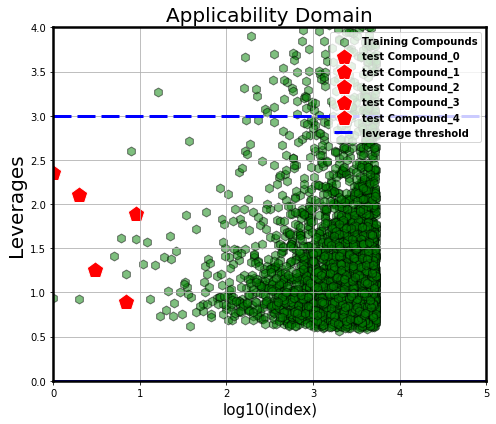

In [115]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}

plt.scatter(np.log10(df_train_5.index), df_train_5['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plt.scatter(np.log10(X_test.index), X_test['leverages'], c='red', s=80, alpha=0.5, label="Test Compounds",  marker="*", edgecolors='black')

# plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')
for i in range(len(in_domain)):
    plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, label="test Compound"+"_"+str(i), marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.grid()
fig.savefig('xgb_AD.png')

In [93]:
new_test.index

Int64Index([3], dtype='int64')

In [96]:
AD = df_test_5['leverages']
actives_list = AD.index
in_domain = []
in_domain_leverages = []
outside_domain = []
for i in actives_list:
    s_new = round(AD[i],3)
    if (s_new > 3).any():
        print('outlier')
        outside_domain.append(i)
    elif (s_new < 3).any():
        print('not outlier')
        in_domain.append(i)
        in_domain_leverages.append(s_new)
in_domain_leverages

not outlier
outlier
not outlier
not outlier
outlier
outlier
not outlier
outlier
not outlier
outlier


[2.349, 1.251, 1.893, 0.894, 2.099]

In [ ]:
plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')

for i in in_domain:
    plt.scatter(np.log10(in_domain[i].index), in_domain_leverages[i], c='red', s=300, label="test Compound", marker="p", edgecolors='white')